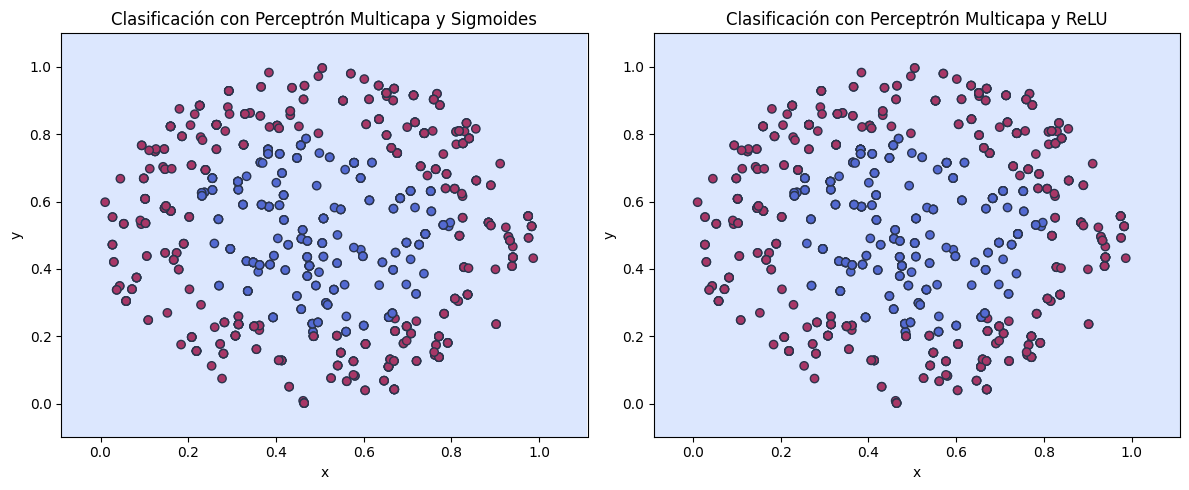

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

class NeuralNetwork:
    def __init__(self, layer_sizes, activation):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.activation = activation

        self.weights = [np.random.rand(layer_sizes[i], layer_sizes[i+1]) for i in range(self.num_layers - 1)]
        self.biases = [np.random.rand(1, layer_sizes[i+1]) for i in range(self.num_layers - 1)]

    def forward(self, X):
        self.activations = [X]
        for i in range(self.num_layers - 1):
            self.activations.append(self.activation(np.dot(self.activations[-1], self.weights[i]) + self.biases[i]))
        return self.activations[-1]

    def backward(self, X, y, output, learning_rate):
        error = y - output
        if self.activation == sigmoid:
            deltas = [error * sigmoid_derivative(output)]
        elif self.activation == relu:
            deltas = [error * relu_derivative(output)]

        for i in range(self.num_layers - 2, 0, -1):
            error = deltas[-1].dot(self.weights[i].T)
            if self.activation == sigmoid:
                deltas.append(error * sigmoid_derivative(self.activations[i]))
            elif self.activation == relu:
                deltas.append(error * relu_derivative(self.activations[i]))
        deltas.reverse()

        for i in range(self.num_layers - 1):
            self.weights[i] += self.activations[i].T.dot(deltas[i]) * learning_rate
            self.biases[i] += np.sum(deltas[i], axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

    def predict(self, X):
        return np.round(self.forward(X))

# Cargar datos
data = np.genfromtxt('concentlite.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

# Definir la arquitectura de la red neuronal para la red con sigmoides
layer_sizes_sigmoid = [X.shape[1], 4, 1]
model_sigmoid = NeuralNetwork(layer_sizes_sigmoid, sigmoid)
model_sigmoid.train(X, y.reshape(-1, 1), epochs=10000, learning_rate=0.1)

# Definir la arquitectura de la red neuronal para la red con ReLU
layer_sizes_relu = [X.shape[1], 2, 2, 2, 2, 1]
model_relu = NeuralNetwork(layer_sizes_relu, relu)
model_relu.train(X, y.reshape(-1, 1), epochs=10000, learning_rate=0.1)

# Calcular los límites de los ejes x e y para centrar los resultados
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

# Predecir y graficar resultados para la red con sigmoides
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max + step, step), np.arange(y_min, y_max + step, step))

Z_sigmoid = model_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sigmoid = Z_sigmoid.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.contourf(xx, yy, Z_sigmoid, alpha=0.3, cmap=plt.cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clasificación con Perceptrón Multicapa y Sigmoides')

# Predecir y graficar resultados para la red con ReLU
plt.subplot(1, 2, 2)
Z_relu = model_relu.predict(np.c_[xx.ravel(), yy.ravel()])
Z_relu = Z_relu.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.contourf(xx, yy, Z_relu, alpha=0.3, cmap=plt.cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clasificación con Perceptrón Multicapa y ReLU')

plt.tight_layout()
plt.show()

